In [2]:
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (2.0, 2.0)

matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Original Image')

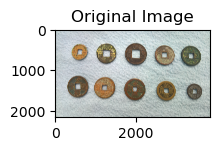

In [4]:
# Image path
import os
__location__ = os.path.realpath(os.getcwd())
filename=os.path.join(__location__, 'HollowCoins.png')

###Read the image
image= cv2.imread(filename,cv2.IMREAD_COLOR)

imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

Text(0.5, 1.0, 'Grayscale Image')

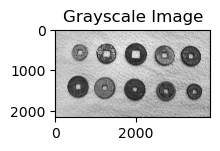

In [5]:
# Convert image to grayscale
# Store it in the variable 'imageGray'
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(imageGray);
plt.title("Grayscale Image")

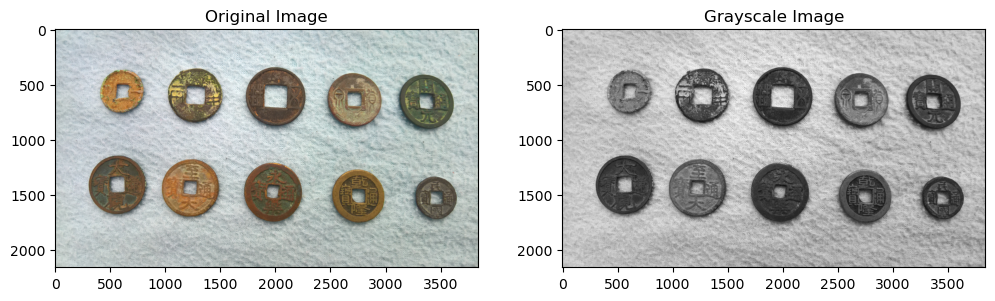

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

In [7]:
# Split cell into channels
# Store them in variables 'imageB', 'imageG', 'imageR'

imageB,imageG,imageR = cv2.split(image)


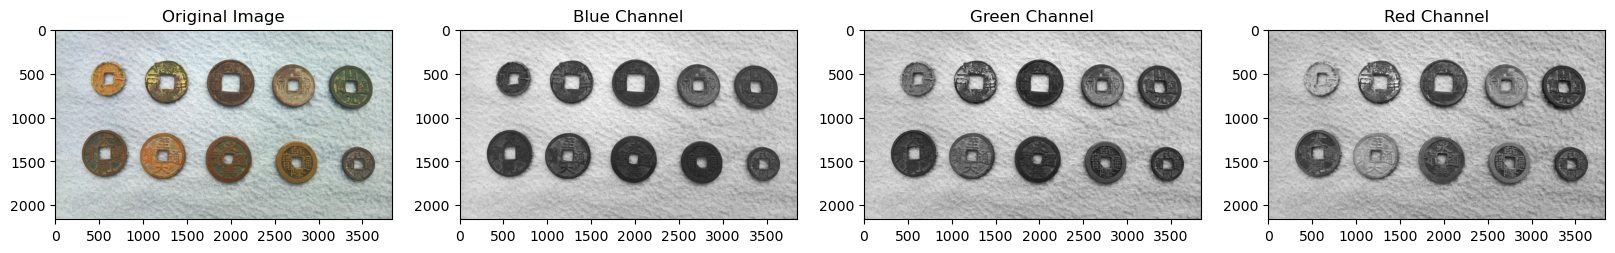

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

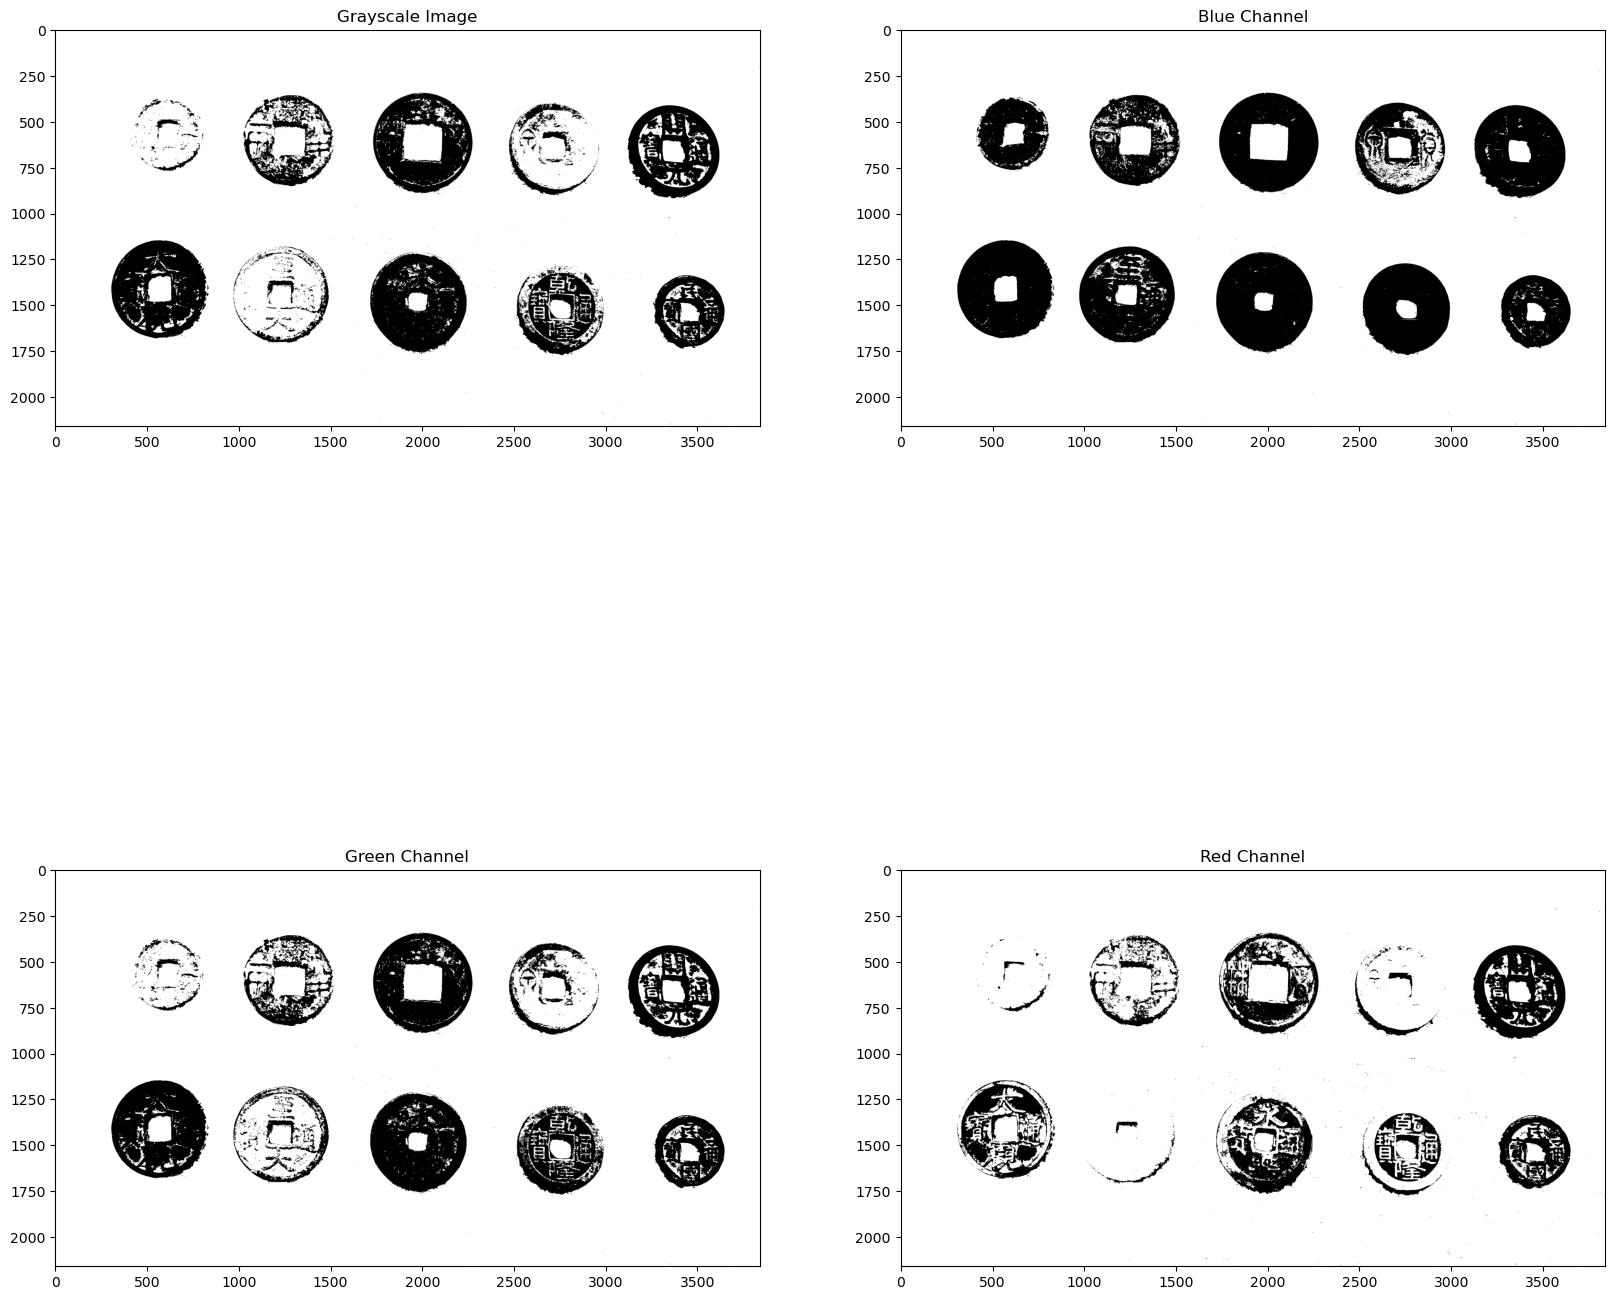

In [9]:
#Double check the images from different channel
thresh=100
maxValue=255
th, threshedImGr = cv2.threshold(imageGray, thresh, maxValue, cv2.THRESH_BINARY)
th, threshedImB=cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
th, threshedImG=cv2.threshold(imageG, thresh, maxValue, cv2.THRESH_BINARY)
th, threshedImR=cv2.threshold(imageR, thresh, maxValue, cv2.THRESH_BINARY)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(threshedImGr);
plt.title("Grayscale Image")
plt.subplot(222)
plt.imshow(threshedImB);
plt.title("Blue Channel")
plt.subplot(223)
plt.imshow(threshedImG);
plt.title("Green Channel")
plt.subplot(224)
plt.imshow(threshedImR);
plt.title("Red Channel");


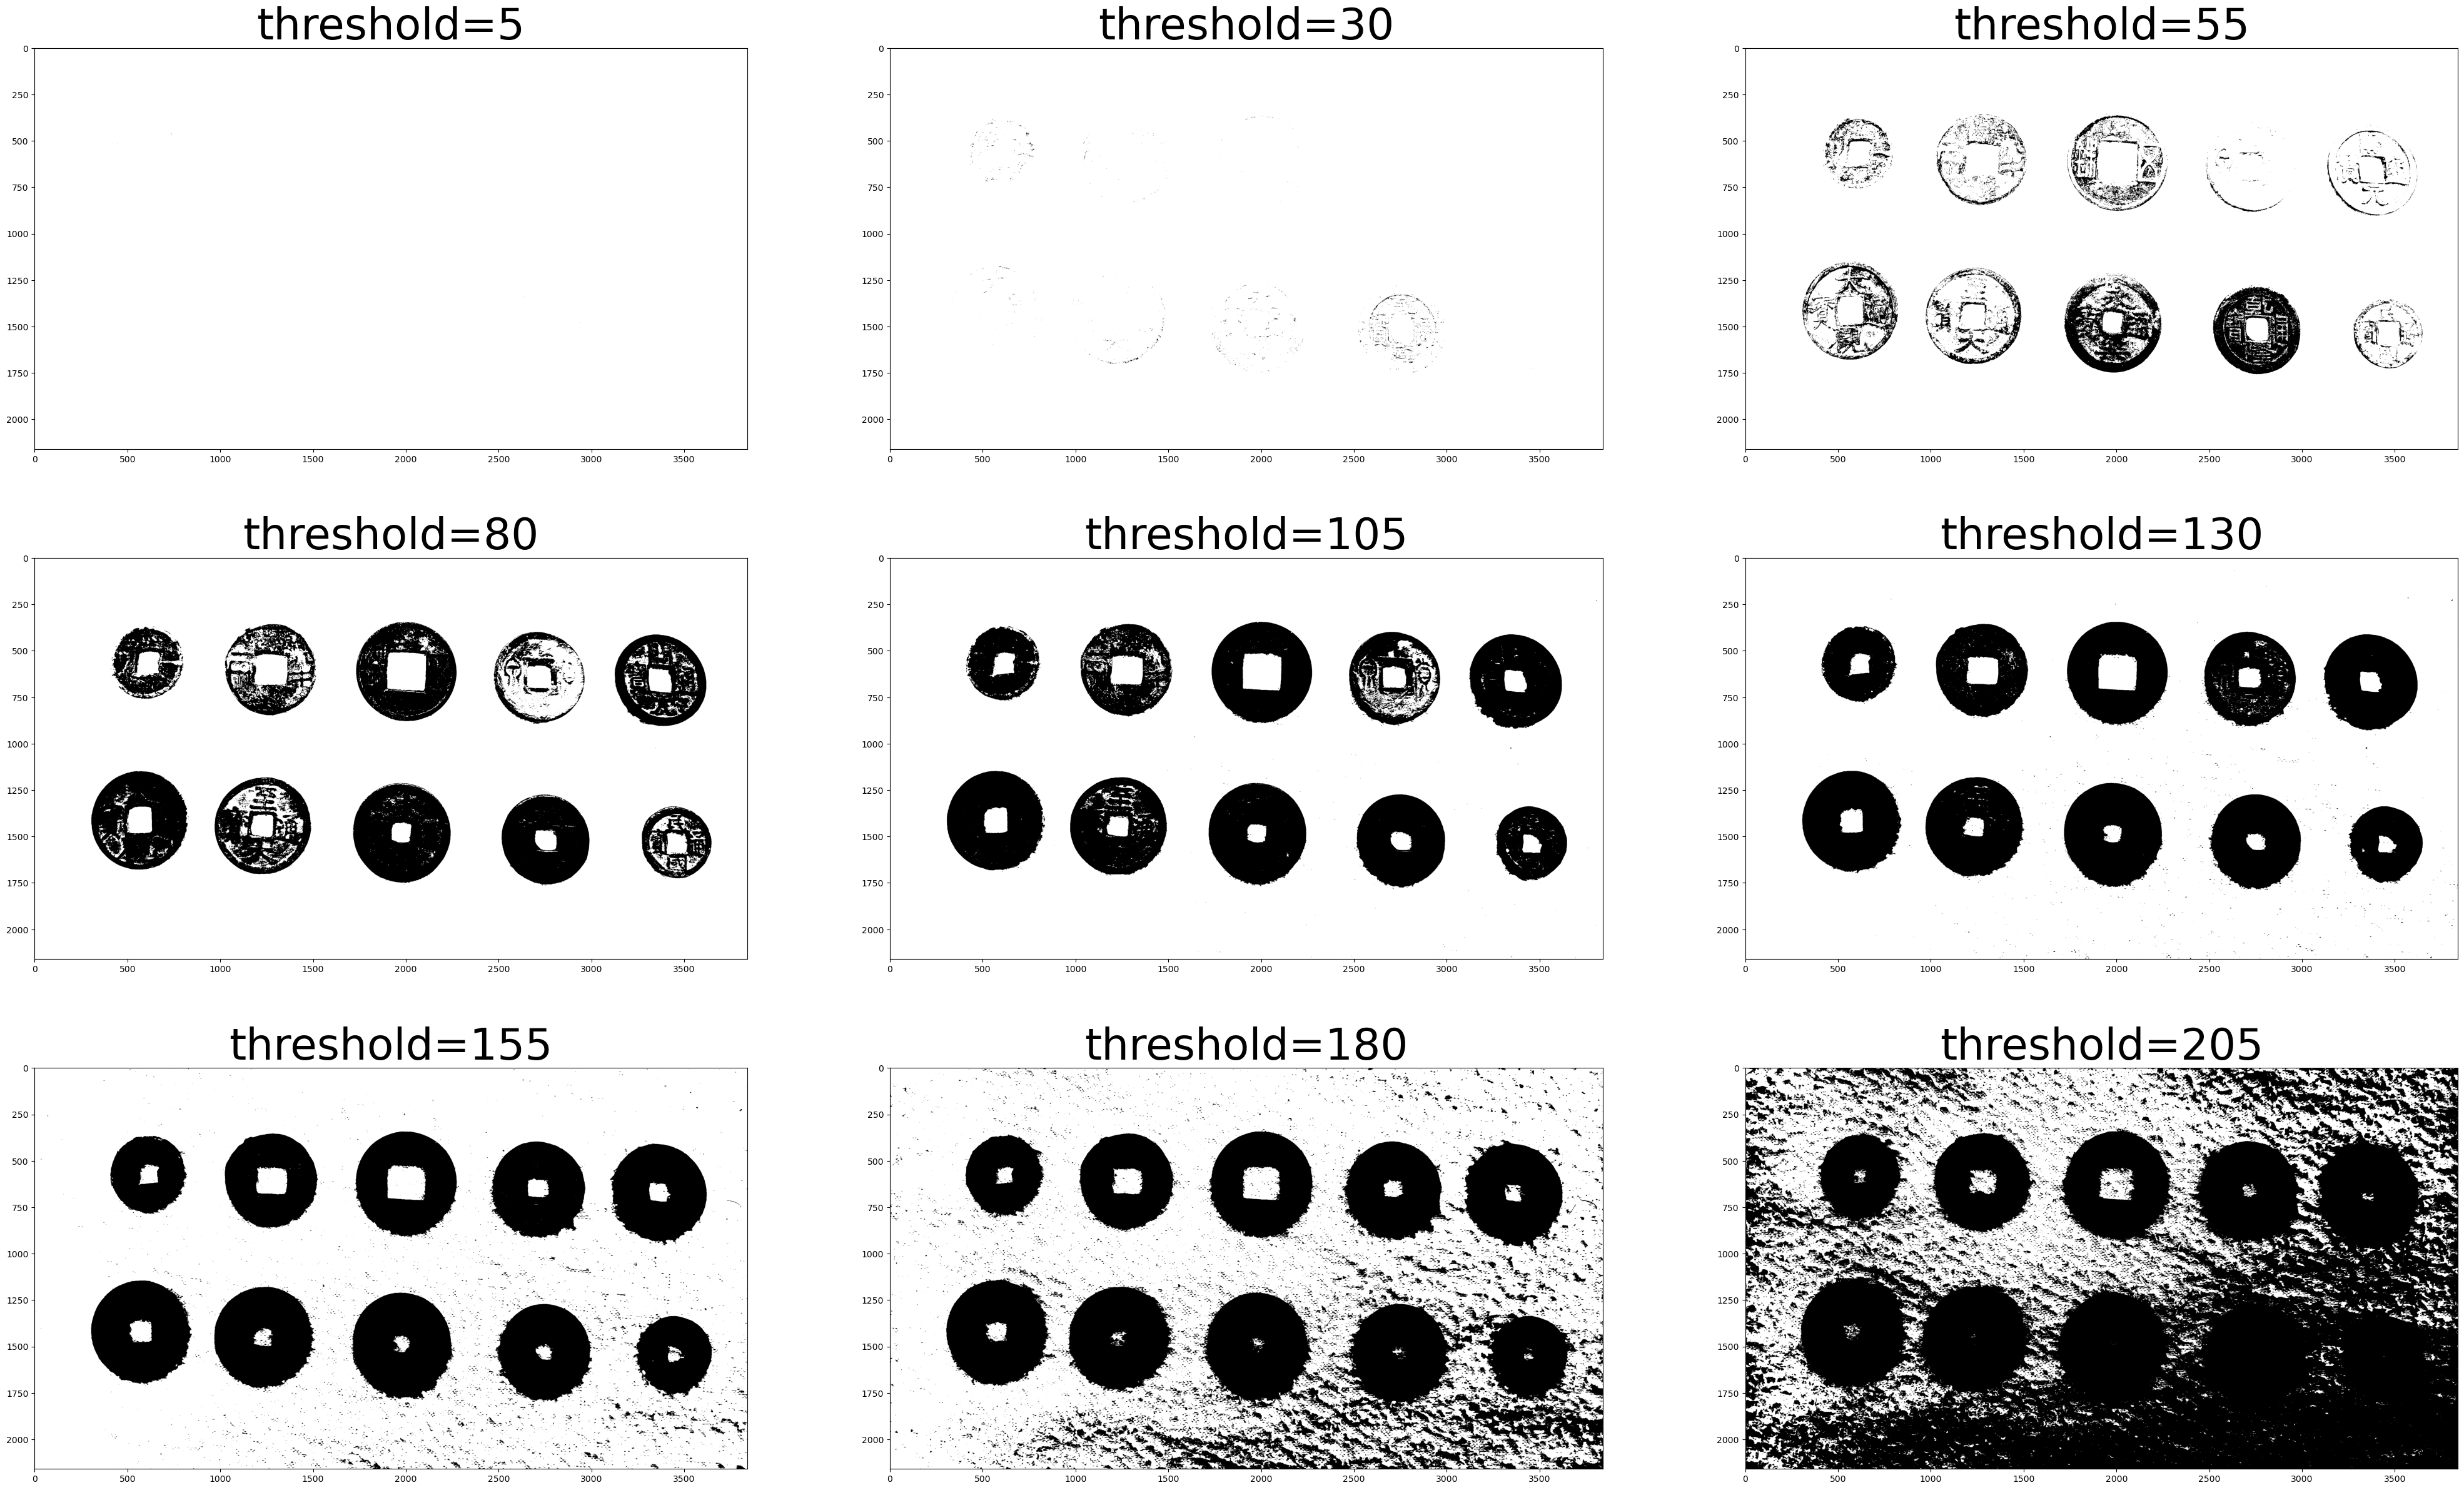

In [10]:

################################################
### CONCLUSION for max value by thresholding ###
# Set the max threshold value to be 255
################################################

### Experiment ###
# Run through a rough list of threshhold values and 
# identify the range to review threshold values in details in the next step
# Use THRESH_BINARY to find the brightest coins first.
# It is easier to view the dark spot on the bright coin
# Then later use THRESH_BINARY_INV to covert to dark coins
##################

maxValue=255
image_array=[]
qty=9
step=25
start=5
end=start+step*qty+1

for thresh in range(5,end,25):
    th, dst = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
    image_array.append(dst)

plt.figure(figsize=(50,30))

imrow=3
imcol=3
for i in range(qty):
    plt.subplot(imrow, imcol, i + 1)
    plt.imshow(image_array[i])
    plt.title("threshold={}".format(start+i*step), size=50)
plt.show()
    


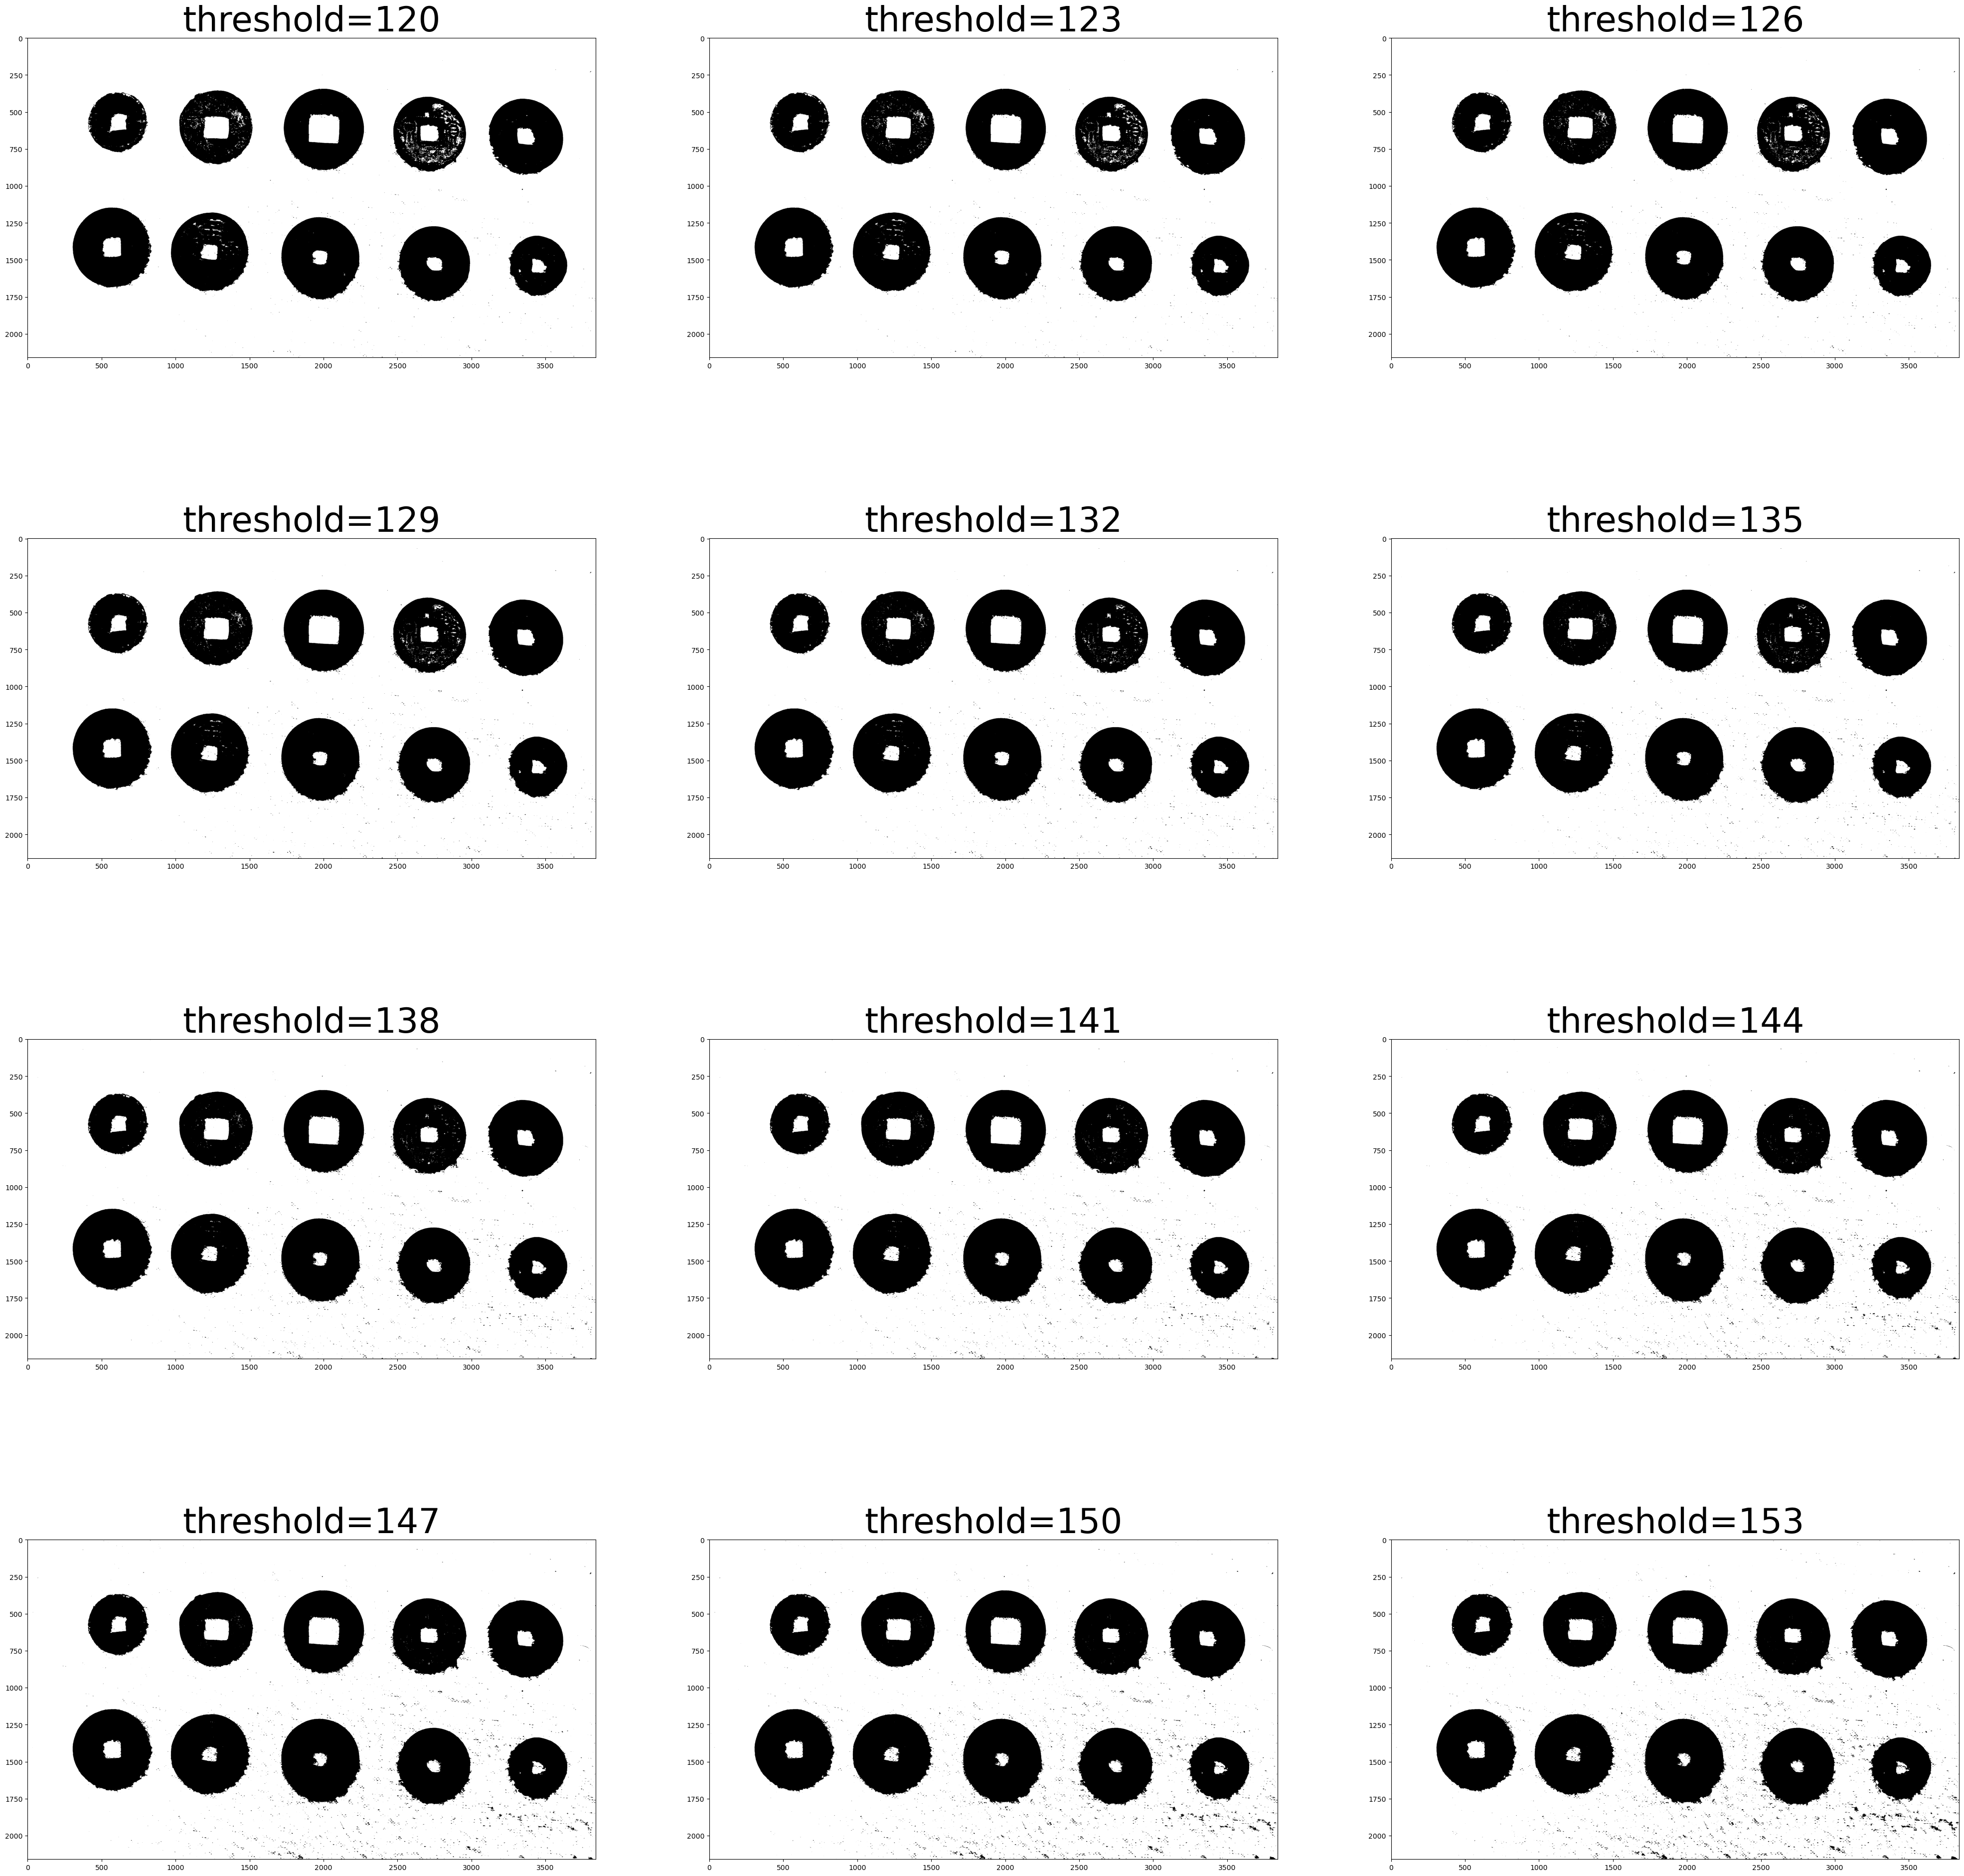

In [11]:
### Experiment ###
# The thresholds ranging from 120 to 160 may work
# lower the threshold step 
##################
maxValue=255
image_array=[]
plt.figure(figsize=(50,50))

imrow=4
imcol=3
qty=12
step=3
start=120
end=start+qty*step+1

for thresh in range(start,end,step):
    th, dst = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
    image_array.append(dst)
    
for i in range(qty):
    plt.subplot(imrow, imcol, i + 1)
    plt.imshow(image_array[i])
    plt.title("threshold={}".format(start+i*step), size=50)
    
plt.show()

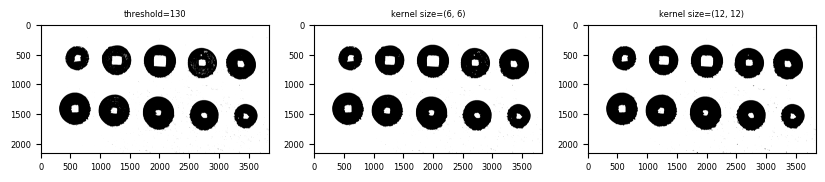

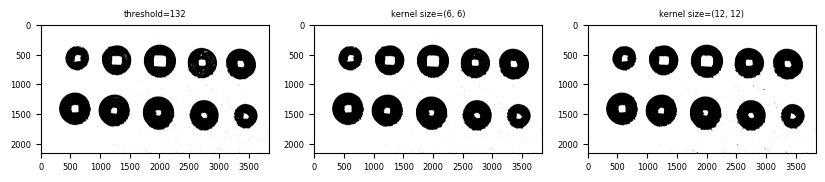

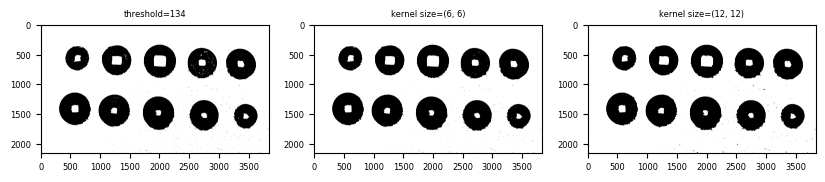

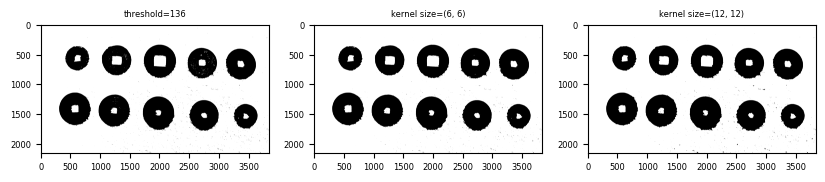

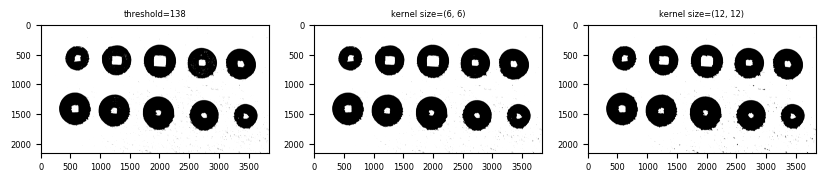

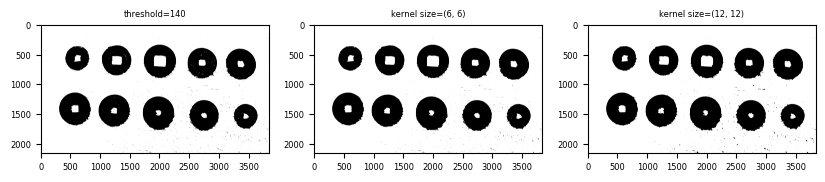

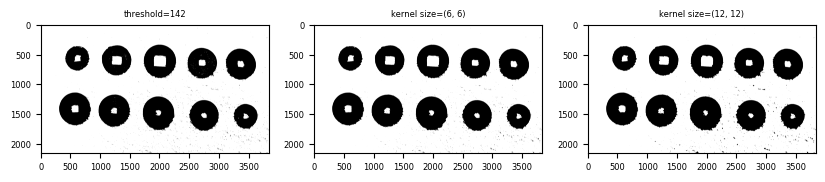

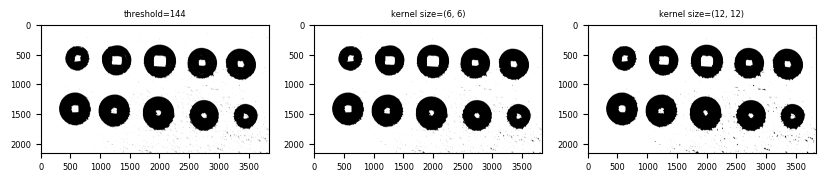

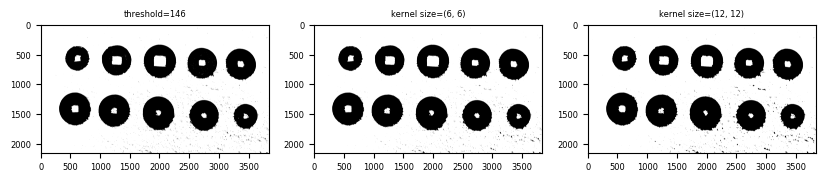

In [12]:
### Experiments ###
# For threshold around 130 to 140, they all seem to meet the criteria of 
# having bright coin and dark enough background with minor blurry spots
###################
# Use post-opening Image for comparison. Include two kernel sizes
# Step through the threshold in this set and use dilated image quality
# to select the final threshold value

matplotlib.rcParams['xtick.labelsize']=6
matplotlib.rcParams['ytick.labelsize']=6

#Dilation on thresholded image (Kernel size 1)
kdSize6 = (6,6)
kernel_d6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kdSize6)

#Dilation on thresholded image (Kernel size 2)
kdSize12 = (12,12)
kernel_d12 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kdSize12)

imrow=1
imcol=3
qty=9
step=2
start=130
end=start+qty*step

itr=1

for thresh in range(start,end,step):
    th, dst = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
    plt.figure(figsize=(10,50))
    plt.subplot(imrow, imcol, 1); plt.imshow(dst);
    plt.title("threshold={}".format(thresh), size=6)
    
    openedIm6 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_d6, iterations=itr)
    plt.subplot(imrow, imcol, 2); plt.imshow(openedIm6);
    plt.title("kernel size={}".format(kdSize6), size=6)
    
    openedIm12 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_d12, iterations=itr)
    plt.subplot(imrow, imcol, 3); plt.imshow(openedIm12);
    plt.title("kernel size={}".format(kdSize12), size=6)
    
    
    


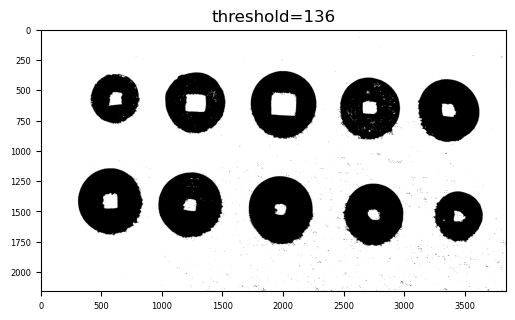

In [13]:
##################
### Conclusion ###
# (1) Background clean up- Large kernel leaves more dark spots in the background
#However, it can close the center hole at the coin faster
# (2) Number of white spots on the coins decreases starting at threshold 134
# (3) Number of dark spots on the background increases starting at threshold 138

####################################
### Final selection of threshold ###
#Use threshold 136 on the bluechannel 
####################################
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
thresh=136
th, threshedIm = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(threshedIm); plt.title("threshold={}".format(thresh)); plt.show()

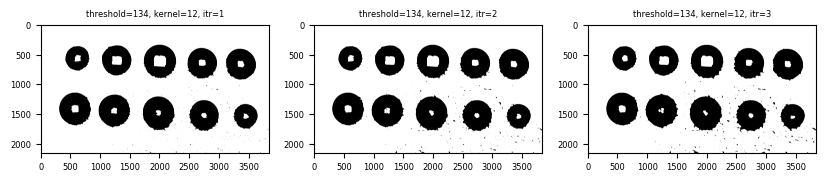

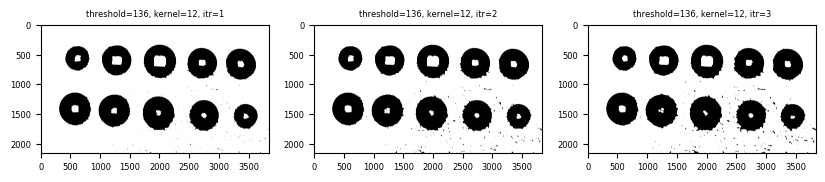

In [14]:
### Experiment for Initial Opening ###
# We will use larger kernel to fill the center holes of the coins as much as possible 
# without significantly adding dark spots at the background
# Comparethe opening iteration to determine final decision

imrow=1
imcol=3
qty=2
step=2
start=134
end=start+qty*step

for thresh in range(start,end,step):
    th, dst = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
    plt.figure(figsize=(10,50))
    op_itrIm1 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_d12, iterations=1)
    plt.subplot(imrow, imcol, 1); plt.imshow(op_itrIm1);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize12[0],1), size=6)
    
    op_itrIm2 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_d12, iterations=2)
    plt.subplot(imrow, imcol, 2); plt.imshow(op_itrIm2);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize12[0],2), size=6)
    
    
    op_itrIm3 = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_d12, iterations=3)
    plt.subplot(imrow, imcol, 3); plt.imshow(op_itrIm3);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize12[0],3), size=6)
    




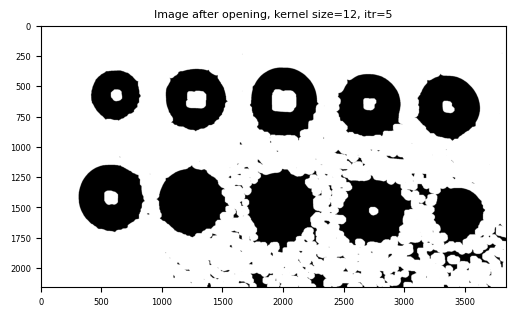

In [15]:
######################################
### Conclusion for Initial opening ###
# (1) Use kernel size 12 and iteration=3 to close center holes on coins without increasing the dark spots on the background
# (2) Keep the threshold to be 136
######################################

itr=5
# Apply dilate function on the input image

IntopenedIm = cv2.morphologyEx(threshedIm, cv2.MORPH_OPEN, kernel_d12, iterations=itr)
plt.imshow(IntopenedIm); plt.title("Image after opening, kernel size={}, itr={}".format(kdSize12[0],itr),size=8); plt.show()



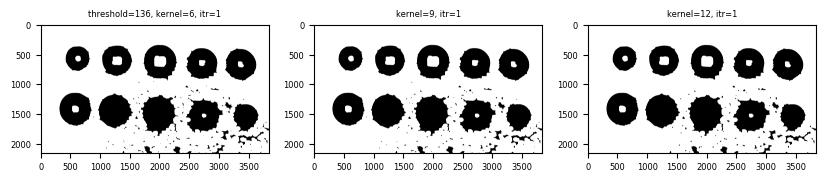

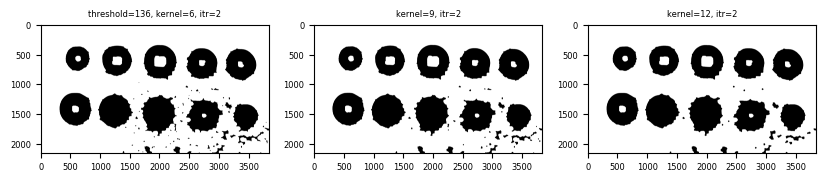

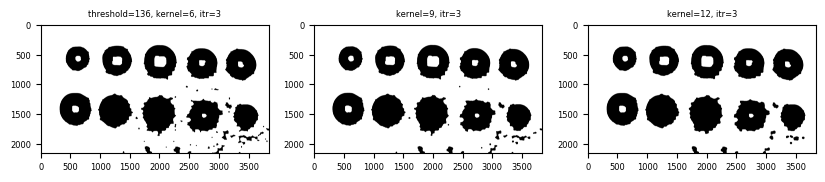

In [16]:
### Experiment ###
### Kernel Size and iterations for closing after opening###
# The goal is to remove the dark spots at the background without
# making the coins cloudy again.

kdSize9 = (9,9)
kernel_d9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kdSize9)

imrow=1
imcol=3
thresh=136

for itr in range(1,4,1):
    plt.figure(figsize=(10,50))
    
    cl_k6Im = cv2.morphologyEx(IntopenedIm, cv2.MORPH_CLOSE, kernel_d6, iterations=itr)
    plt.subplot(imrow, imcol, 1); plt.imshow(cl_k6Im);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize6[0],itr), size=6)
    
    cl_k9Im = cv2.morphologyEx(IntopenedIm, cv2.MORPH_CLOSE, kernel_d9, iterations=itr)
    plt.subplot(imrow, imcol, 2); plt.imshow(cl_k9Im);
    plt.title("kernel={}, itr={}".format(kdSize9[0],itr), size=6)

    cl_k12Im = cv2.morphologyEx(IntopenedIm, cv2.MORPH_CLOSE, kernel_d12, iterations=itr)
    plt.subplot(imrow, imcol, 3); plt.imshow(cl_k12Im);
    plt.title("kernel={}, itr={}".format(kdSize12[0],itr), size=6)

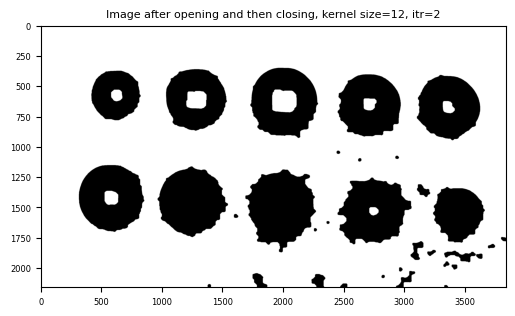

In [17]:
###############################
### Conclusion for closing kernel size and iteration ###
# The goal is to remove dark spots at the background without making the coins cloudy again.
# Kernel 12 with 2 iterations works well without making too many bumps along the coin's perimeter.
# Therefore, use kernel 12 and 2 iterations 

itr=2
Finalop2clIm=cv2.morphologyEx(IntopenedIm, cv2.MORPH_CLOSE, kernel_d12, iterations=itr)
plt.imshow(Finalop2clIm); plt.title("Image after opening and then closing, kernel size={}, itr={}".format(kdSize12[0],itr),size=8); plt.show()

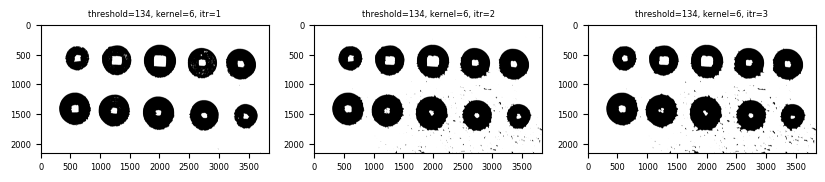

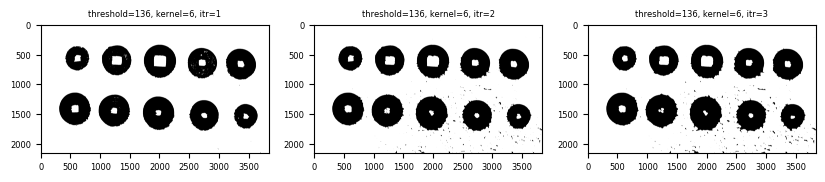

In [18]:
### Experiment for Initial Closing ###
# We will use larger kernel to first remove dark spots on the background
# without significantly enlarging the center hole at the coins
# Compare the closing iteration to determine final decision

imrow=1
imcol=3
qty=2
step=2
start=134
end=start+qty*step

for thresh in range(start,end,step):
    th, dst = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
    plt.figure(figsize=(10,50))
    cl_itrIm1 = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel_d6, iterations=1)
    plt.subplot(imrow, imcol, 1); plt.imshow(cl_itrIm1);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize6[0],1), size=6)
    
    cl_itrIm2 = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel_d6, iterations=2)
    plt.subplot(imrow, imcol, 2); plt.imshow(op_itrIm2);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize6[0],2), size=6)
    
    
    cl_itrIm3 = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel_d6, iterations=3)
    plt.subplot(imrow, imcol, 3); plt.imshow(op_itrIm3);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize6[0],3), size=6)
    

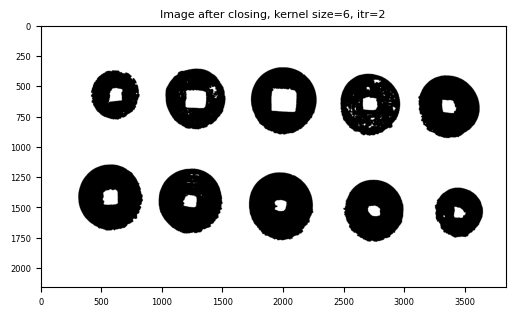

In [19]:
######################################
### Conclusion for Initial closing ###
# (1) Use kernel size 6 and iteration=2 to remove the dark spots on the background. 
# (2) Keep the threshold to be 136
# (3) More iterations make the background cloudy
######################################

itr=2
# Apply dilate function on the input image

FinalclosedIm = cv2.morphologyEx(threshedIm, cv2.MORPH_CLOSE, kernel_d6, iterations=itr)
plt.imshow(FinalclosedIm); plt.title("Image after closing, kernel size={}, itr={}".format(kdSize6[0],itr),size=8); plt.show()


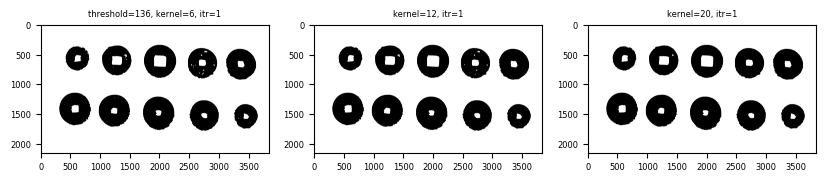

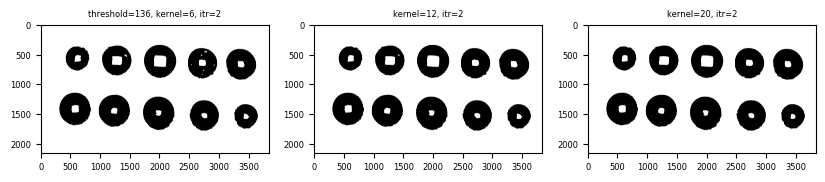

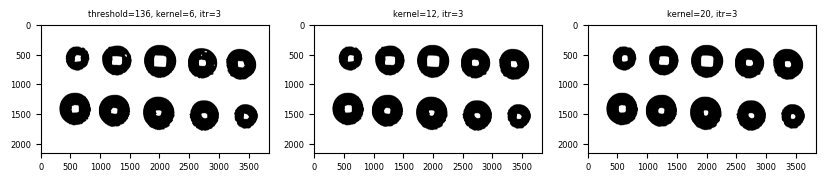

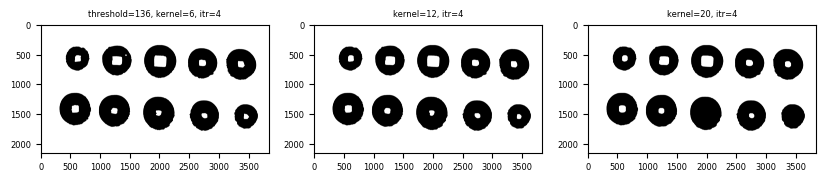

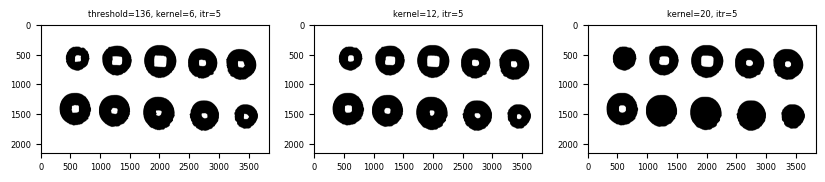

In [ ]:
### Experiment ###
### Kernel Size and iterations for opening after closing###
# The goal is to remove the white spots at the coins without
# making the background cloudy again.

kdSize20 = (20,20)
kernel_d20 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kdSize20)

imrow=1
imcol=3
thresh=136

for itr in range(1,8,1):
    plt.figure(figsize=(10,50))
    
    op_k6Im = cv2.morphologyEx(FinalclosedIm, cv2.MORPH_OPEN, kernel_d6, iterations=itr)
    plt.subplot(imrow, imcol, 1); plt.imshow(op_k6Im);
    plt.title("threshold={}, kernel={}, itr={}".format(thresh, kdSize6[0],itr), size=6)  

    op_k12Im = cv2.morphologyEx(FinalclosedIm, cv2.MORPH_OPEN, kernel_d12, iterations=itr)
    plt.subplot(imrow, imcol, 2); plt.imshow(op_k12Im);
    plt.title("kernel={}, itr={}".format(kdSize12[0],itr), size=6)
    
    op_k20Im = cv2.morphologyEx(FinalclosedIm, cv2.MORPH_OPEN, kernel_d20, iterations=itr)
    plt.subplot(imrow, imcol, 3); plt.imshow(op_k20Im);
    plt.title("kernel={}, itr={}".format(kdSize20[0],itr), size=6)

In [ ]:
###############################
### Conclusion for opening kernel size and iteration ###
# The goal is to remove white center at each coin without making the background cloudy again.
# Kernel 20 with 7 iterations works well without connecting adjacent coins.
# An additional iteration afterward does not help but reducing the spacing between coins
# Therefore, use kernel 20 and 7 iterations 
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
itr=7
Itrcl2opIm=cv2.morphologyEx(FinalclosedIm, cv2.MORPH_OPEN, kernel_d20, iterations=itr)
plt.imshow(Itrcl2opIm); plt.title("Image after closing and then opening, kernel size={}, itr={}".format(kdSize20[0],itr),size=8); plt.show()

In [ ]:
#Another iteration of closing and then opening
InitialIm=threshedIm.copy()
closingItr=2
openingItr=7
imrow=1
imcol=2
itr=3
for i in range(itr):
    
    plt.figure(figsize=(6,30))
    NowclosedIm = cv2.morphologyEx(InitialIm, cv2.MORPH_CLOSE, kernel_d6, iterations=closingItr)
    plt.subplot(imrow, imcol, 1);
    plt.imshow(NowclosedIm); plt.title("cl->op Cycle {}: (closing kernel size={}, itr={})".format(str(i+1),kdSize6[0],closingItr),size=8); 
    
    Nowcl2opIm=cv2.morphologyEx(NowclosedIm, cv2.MORPH_OPEN, kernel_d20, iterations=openingItr)
    plt.subplot(imrow, imcol, 2);
    plt.imshow(Nowcl2opIm); plt.title("open kernel size={}, itr={}".format(kdSize20[0],openingItr),size=8); 
    InitialIm=Nowcl2opIm.copy()



In [ ]:
#Final close to open image
InitialIm=threshedIm.copy()
closingItr=2
openingItr=7
imrow=1
imcol=2
itr=1
for i in range(itr):
    
    plt.figure(figsize=(6,30))
    NowclosedIm = cv2.morphologyEx(InitialIm, cv2.MORPH_CLOSE, kernel_d6, iterations=closingItr)
    plt.subplot(imrow, imcol, 1);
    plt.imshow(NowclosedIm); plt.title("cl->op Cycle {}: (closing kernel size={}, itr={})".format(str(i+1),kdSize6[0],closingItr),size=8); 
    
    Nowcl2opIm=cv2.morphologyEx(NowclosedIm, cv2.MORPH_OPEN, kernel_d20, iterations=openingItr)
    plt.subplot(imrow, imcol, 2);
    plt.imshow(Nowcl2opIm); plt.title("open kernel size={}, itr={}".format(kdSize20[0],openingItr),size=8); 
    InitialIm=Nowcl2opIm.copy()

Finalcl2opIm=Nowcl2opIm.copy()
plt.figure(figsize=(10,15))
plt.imshow(Finalcl2opIm);
plt.title("Iterated close->open image",size=15);
plt.show()

In [ ]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [ ]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [ ]:
keypoints = detector.detect(Finalcl2opIm)

In [ ]:
print(len(keypoints))

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
blobIm = cv2.cvtColor(Finalcl2opIm, cv2.COLOR_GRAY2BGR)
 
# Mark blobs using image annotation concepts we have studied so far
count=0
for k in keypoints:
    count+=1
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.putText(blobIm,str(count),(x,y),cv2.FONT_HERSHEY_SIMPLEX, 4,(255,255,255),10)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(blobIm,(x,y),radius,(25,25,255),20)
    
plt.imshow(blobIm[:,:,::-1])

In [ ]:
#Show detection on the original image
blobOriginal=image.copy()
# Mark blobs using image annotation concepts we have studied so far
count=0
for k in keypoints:
    count+=1
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(blobOriginal,(x,y),5,(0,0,0),20)
    #cv2.putText(blobIm,str(count),(x,y),cv2.FONT_HERSHEY_SIMPLEX, 4,(255,255,255),10)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(blobOriginal,(x,y),radius,(25,25,255),20)
    
plt.imshow(blobOriginal[:,:,::-1])

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
thresh=128
maxValue=255

th2,Inv_FinalIm=cv2.threshold(Finalcl2opIm, thresh, maxValue, cv2.THRESH_BINARY_INV )
print(Inv_FinalIm.shape)
plt.imshow(Inv_FinalIm)


In [ ]:
matplotlib.rcParams['figure.figsize'] = (4.0, 4.0)

# Find connected components
_, imLabels = cv2.connectedComponents(Inv_FinalIm)
nComponents = imLabels.max()
print(nComponents)
plt.imshow(imLabels)

In [ ]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

In [ ]:
displayConnectedComponents(imLabels)

In [ ]:


#Find only external contours
contours, hierarchy = cv2.findContours(Finalcl2opIm, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print("Number of contours found = {}".format(len(contours)))

In [ ]:
contourIm=image.copy()
# Draw all the contours #last element is line width
cv2.drawContours(contourIm, contours, -1, (20,20,20), 50);

In [ ]:
'''
txtfnt=cv2.FONT_HERSHEY_SIMPLEX
fntscale=4
fntcolor=(25,25,255)            
lnthick=10 
lntype=cv2.LINE_AA
   
count=0
for cnt in contours:
    count+=1
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(contourIm, (x,y), 10, (0,0,255), -1);
    #ax_x=int(x+10*count)
    #ax_y=int(y+10*count)
    #cv2.putText(contourIm,str(count),(ax_x,ax_y),txtfnt, fntscale,fntcolor,lnthick, lntype)
    '''

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

plt.imshow(contourIm[:,:,::-1])

In [ ]:
#Find only external contours
Excontours, hierarchy = cv2.findContours(Finalcl2opIm, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of contours found = {}".format(len(Excontours)))

In [ ]:
ExcontourIm=image.copy()
# Draw all the contours #last element is line width
cv2.drawContours(ExcontourIm, Excontours, -1, (20,255,20), 50);

plt.imshow(ExcontourIm[:,:,::-1])

In [ ]:
#Use Area to remove the two smallest contours
area_array=[]
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    area_array.append(area)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))





In [ ]:
#Print sorted area of contours

sorted_area=np.sort(area_array)
for i in range(len(area_array)):
    print(sorted_area[i])

In [ ]:
Innercontours=contours.copy()
Innerarray=area_array.copy()

ctridx_max=np.argmax(np.array(area_array))
Innercontours.pop(ctridx_max)
Innerarray.pop(ctridx_max)

ctridx_min1=np.argmin(np.array(Innerarray))
Innercontours.pop(ctridx_min1)
Innerarray.pop(ctridx_min1)

ctridx_min2=np.argmin(np.array(Innerarray))
Innercontours.pop(ctridx_min2)
print(len(Innercontours))

In [ ]:
InnerctrIm=image.copy()
# Draw all the contours #last element is line width
cv2.drawContours(InnerctrIm, Innercontours, -1, (255,0,0), 15);
count=0
for cnt in Innercontours:
    count+=1
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(InnerctrIm, (x,y), 25, (0,0,255), -1);
    cv2.putText(InnerctrIm,str(count),(x+35,y+35),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),10)
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

plt.imshow(InnerctrIm[:,:,::-1])

In [ ]:
# Fit circles on coins
FinalIm=image.copy()
count=0
for cnt in Innercontours:
    
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(FinalIm, (x,y), 25, (0,0,255), -1);

for cnt in Innercontours:
    # Fit a circle
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(FinalIm, (int(x),int(y)), int(round(radius)), (255,0,0), 25)
    
print("Number of coins detected = {}".format(len(Innercontours)))

plt.imshow(FinalIm[:,:,::-1])

## <font style = "color:rgb(50,255,50)">End of File</font>